Import Libraries and read the CSV file

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import prince
import seaborn as sns
import csv

sns.set()

customer_data = pd.read_csv('customer_data.csv')
customer_data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Look at the data to understand the fields.

In [41]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Look at the data types in the data frame

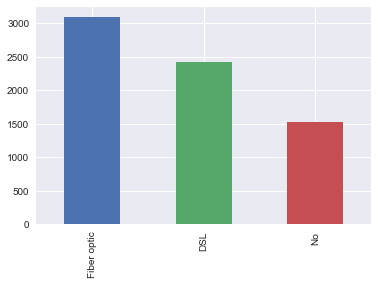

In [42]:
internet_counts = customer_data.InternetService.value_counts()
internet_counts.plot.bar()

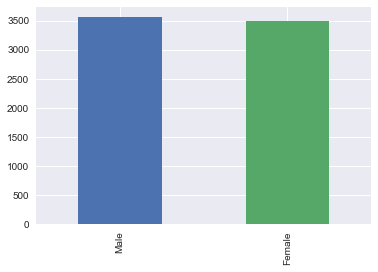

In [43]:
gender_counts = customer_data.gender.value_counts()
gender_counts.plot.bar()

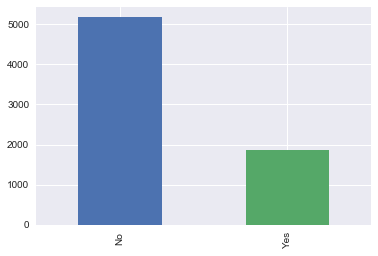

In [44]:
churn_counts = customer_data.Churn.value_counts()
churn_counts.plot.bar()

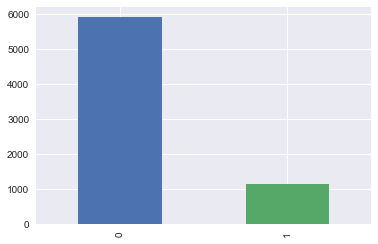

In [45]:
senior_counts = customer_data.SeniorCitizen.value_counts()
senior_counts.plot.bar()

Where 1 = Yes and 2 = No

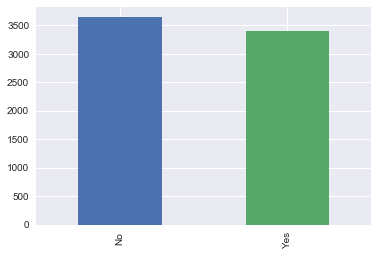

In [46]:
partner_counts = customer_data.Partner.value_counts()
partner_counts.plot.bar()

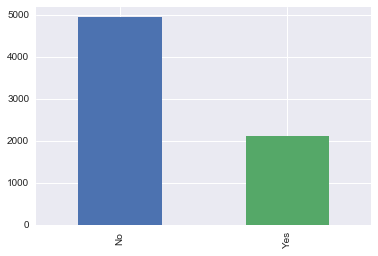

In [47]:
dependent_count = customer_data.Dependents.value_counts()
dependent_count.plot.bar()

In [48]:
customer_data.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

Mean is 32, and Median is 29, which is not too far off and the Std. Deviation is 24.5 so it's understandable that we would have a max at 72, and a top 25% of 55.

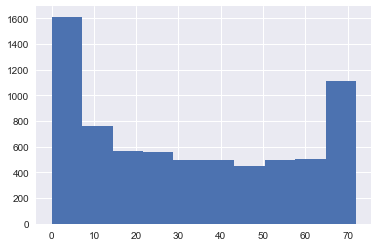

In [49]:
customer_data.tenure.hist()

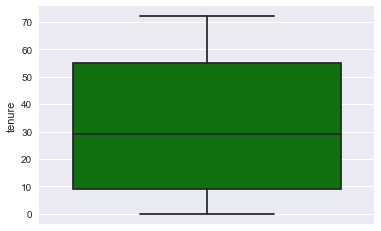

In [50]:
sns.boxplot(customer_data.tenure, color='green', orient = 'v')

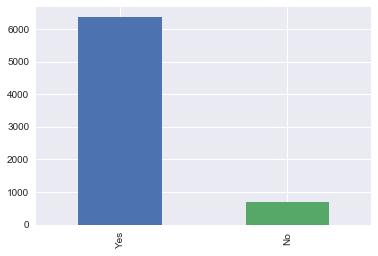

In [51]:
phone_count = customer_data.PhoneService.value_counts()
phone_count.plot.bar()

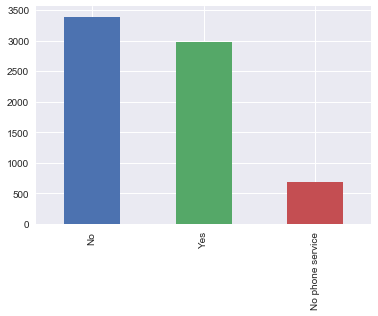

In [52]:
multi_line_count = customer_data.MultipleLines.value_counts()
multi_line_count.plot.bar()

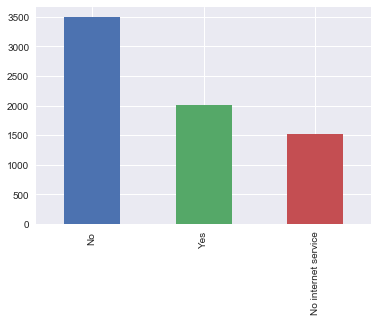

In [53]:
ols_count = customer_data.OnlineSecurity.value_counts()
ols_count.plot.bar()

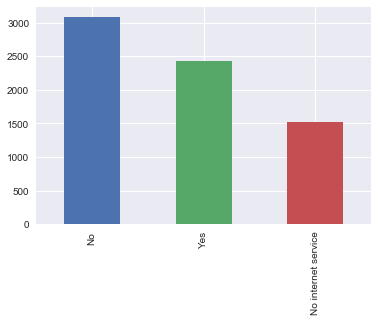

In [54]:
olb_count = customer_data.OnlineBackup.value_counts()
olb_count.plot.bar()

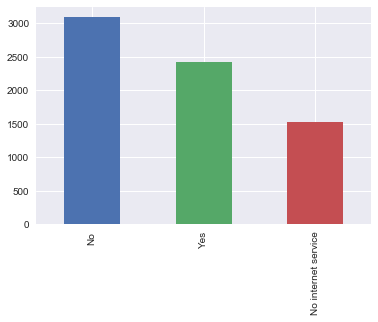

In [55]:
device_protection_count = customer_data.DeviceProtection.value_counts()
device_protection_count.plot.bar()

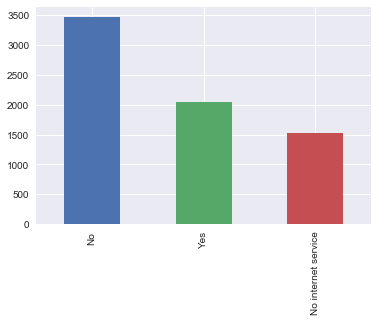

In [56]:
ts_count = customer_data.TechSupport.value_counts()
ts_count.plot.bar()

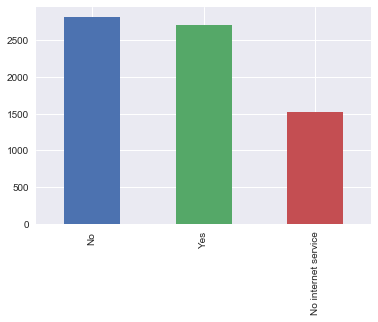

In [57]:
streaming_tv_counts = customer_data.StreamingTV.value_counts()
streaming_tv_counts.plot.bar()

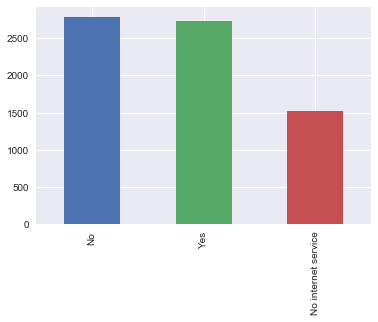

In [58]:
streaming_movie_counts = customer_data.StreamingMovies.value_counts()
streaming_movie_counts.plot.bar()

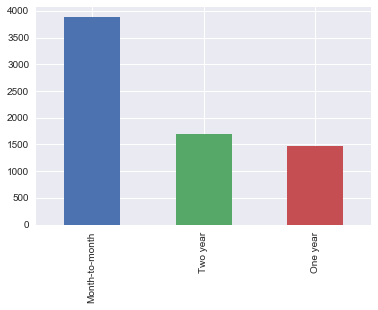

In [59]:
contract_counts = customer_data.Contract.value_counts()
contract_counts.plot.bar()

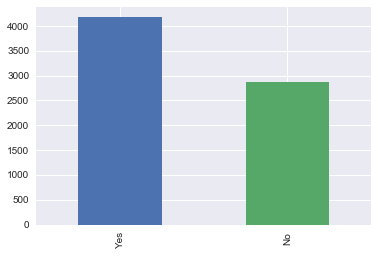

In [60]:
paperless_count = customer_data.PaperlessBilling.value_counts()
paperless_count.plot.bar()

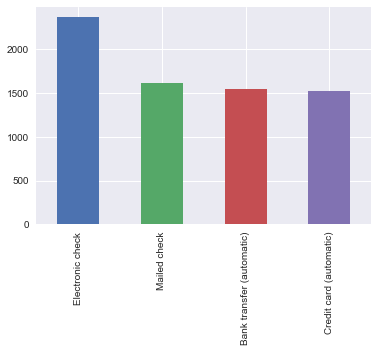

In [61]:
payment_method_counts = customer_data.PaymentMethod.value_counts()
payment_method_counts.plot.bar()

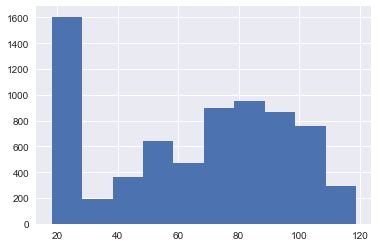

In [62]:
customer_data.MonthlyCharges.hist()

In [63]:
customer_data.MonthlyCharges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

Looks like the MEAN charges are \$64.76 or approx. $65/month, but the median is closer to 70.The Standart Deviation accounts for the 25th and 75th quartiles, and the Max appears to be an outlier.

In [64]:
customer_data.MonthlyCharges.mode()

0    20.05
dtype: float64

The most common amount is \$20/month.

In [65]:
customer_data.TotalCharges = customer_data.TotalCharges.map(lambda x: x if x != ' ' else 0)
customer_data.TotalCharges = customer_data.TotalCharges.astype(float)
customer_data.TotalCharges.head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [66]:
customer_data.TotalCharges.describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

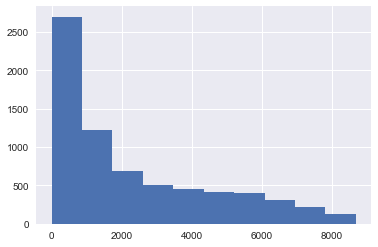

In [67]:
customer_data.TotalCharges.hist()

In [98]:
crosstabs = []
for c in customer_data.columns:
    if c != 'Churn' and c != 'customerID' and c != 'tenure' and c != 'MonthlyCharges' and c != 'TotalCharges':
        crosstabs.append({c: pd.crosstab(customer_data.Churn, customer_data[c]).unstack()})
print(crosstabs)


[{'gender': gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
dtype: int64}, {'SeniorCitizen': SeniorCitizen  Churn
0              No       4508
               Yes      1393
1              No        666
               Yes       476
dtype: int64}, {'Partner': Partner  Churn
No       No       2441
         Yes      1200
Yes      No       2733
         Yes       669
dtype: int64}, {'Dependents': Dependents  Churn
No          No       3390
            Yes      1543
Yes         No       1784
            Yes       326
dtype: int64}, {'PhoneService': PhoneService  Churn
No            No        512
              Yes       170
Yes           No       4662
              Yes      1699
dtype: int64}, {'MultipleLines': MultipleLines     Churn
No                No       2541
                  Yes       849
No phone service  No        512
                  Yes       170
Yes               No       2121
                  Yes       850
dtype: int64}, {'

In [32]:
customer_data.gender = customer_data.gender.map({'Male': 1, 'Female': 0})
customer_data.Partner = customer_data.Partner.map({'Yes': 1, 'No': 0})
customer_data.Dependents = customer_data.Dependents.map({'Yes': 1, 'No':0})
customer_data.PhoneService = customer_data.PhoneService.map({'Yes':1,'No':0})
customer_data.MultipleLines = customer_data.MultipleLines.map({'No phone service': 0, 'No': 1, 'Yes': 2})
customer_data.InternetService = customer_data.InternetService.map({'No': 0, 'DSL': 1, 'Fiber optic': 2})
customer_data.OnlineSecurity = customer_data.OnlineSecurity.map({'No internet service':0, 'No': 1, 'Yes': 2})
customer_data.OnlineBackup = customer_data.OnlineBackup.map({'No internet service':0, 'No': 1, 'Yes': 2})
customer_data.DeviceProtection = customer_data.DeviceProtection.map({'No internet service':0, 'No': 1, 'Yes': 2})
customer_data.TechSupport = customer_data.TechSupport.map({'No internet service':0, 'No': 1, 'Yes': 2})
customer_data.StreamingTV = customer_data.StreamingTV.map({'No internet service':0, 'No': 1, 'Yes': 2})
customer_data.StreamingMovies = customer_data.StreamingMovies.map({'No internet service':0, 'No': 1, 'Yes': 2})
customer_data.Contract = customer_data.Contract.map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
customer_data.PaperlessBilling = customer_data.PaperlessBilling.map({'No': 0, 'Yes': 1})
customer_data.PaymentMethod = customer_data.PaymentMethod.map({'Electronic check': 1, 'Mailed check': 0, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})
customer_data.Churn = customer_data.Churn.map({'Yes':1, 'No':0})
customer_data = customer_data.drop(columns=['customerID'])
customer_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,1,2,1,1,1,1,0,1,1,29.85,29.85,0
1,1,0,0,0,34,1,1,1,2,1,2,1,1,1,1,0,0,56.95,1889.50,0
2,1,0,0,0,2,1,1,1,2,2,1,1,1,1,0,1,0,53.85,108.15,1
3,1,0,0,0,45,0,0,1,2,1,2,2,1,1,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,1,2,1,1,1,1,1,1,0,1,1,70.70,151.65,1


Let's separate our target variable.

In [33]:
churn_column = customer_data.Churn
customer_data = customer_data.drop(columns='Churn')
print(churn_column.head())
print(customer_data.head())

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              0                1               1             2   
1              1                1               2             1   
2              1                1               2             2   
3              0                1               2             1   
4              1                2               1             1   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 1            1 

It looks like the total charges accounts for 99% of the variance in the data. I don't think that the overall cumulative charges for a customer has a positive bearing, in the sense that they have spent quite a lot of money, on their decision to terminate service. It will now be removed from the overall dataframe.

In [34]:
#customer_data = customer_data.drop(columns=['TotalCharges'])
#customer_data.head()

In [35]:
pca = prince.PCA(n_components = 6)
fit = pca.fit(customer_data)
fit = fit.transform(customer_data)
pca.column_correlations(customer_data)

,0,1,2,3,4,5
gender,0.013912,0.008427,0.014954,-0.017376,0.150766,-0.986475
SeniorCitizen,-0.218055,-0.190235,-0.221460,0.351035,0.692473,0.072463
Partner,-0.162001,0.576357,0.084050,-0.448013,0.433721,0.079637
Dependents,0.081383,0.483054,0.196244,-0.689974,0.163998,0.037024
tenure,-0.389222,0.796170,0.046727,0.288533,0.025394,-0.011864
PhoneService,0.011594,0.167783,-0.872304,-0.168215,-0.195965,-0.029705
MultipleLines,-0.315348,0.266157,-0.810945,-0.069380,-0.105406,-0.020038
InternetService,-0.821550,-0.323280,-0.213048,-0.102610,0.044003,0.001448
OnlineSecurity,-0.791297,-0.065710,0.255844,-0.060773,-0.134340,-0.010588
OnlineBackup,-0.836277,-0.090091,0.157630,-0.031748,-0.042327,-0.004035


[48306.77274125901, 18841.071044732143, 13513.83561369278, 8099.50937078051, 7080.048844841451, 7046.489363137341] [0.36099129962007076, 0.14079729066360883, 0.10098743518157469, 0.06052675946090937, 0.05290844096670416, 0.05265765458153553]


(array([3., 1., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 7046.48936314, 11172.51770095, 15298.54603876, 19424.57437657,
        23550.60271439, 27676.6310522 , 31802.65939001, 35928.68772782,
        40054.71606563, 44180.74440345, 48306.77274126]),
 <a list of 10 Patch objects>)

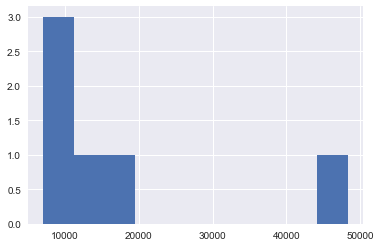

In [36]:
print(pca.eigenvalues_, pca.explained_inertia_)
plt.hist(pca.eigenvalues_)

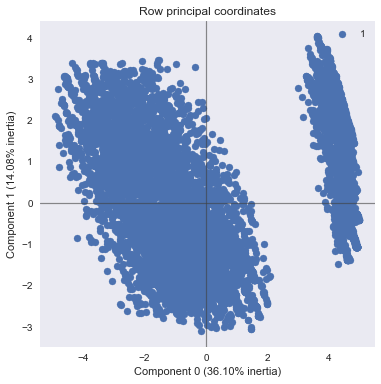

In [37]:
pca.plot_row_coordinates(customer_data)

In [38]:
np.cov(customer_data, rowvar=False)

array([[ 2.50012874e-01, -3.45344819e-04, -4.51803287e-04,
         2.40894545e-03,  6.27047032e-02, -9.59396458e-04,
        -3.03715122e-03, -4.04255871e-03, -5.09016649e-03,
        -4.51506897e-03, -1.74124116e-03, -3.33198876e-03,
        -3.28279204e-03, -3.79669610e-03,  5.24227306e-05,
        -2.88829083e-03, -5.70226236e-03, -2.19201462e-01,
        -9.10180587e-02],
       [-3.45344819e-04,  1.35874516e-01,  3.03557854e-03,
        -3.56617118e-02,  1.49978448e-01,  9.34979563e-04,
         2.69590949e-02,  7.44716706e-02,  2.13095174e-02,
         3.94179819e-02,  3.81591105e-02,  1.76097630e-02,
         4.66493346e-02,  4.93398103e-02, -4.38114100e-02,
         2.83563825e-02,  1.39805575e-02,  2.44206152e+00,
         8.60685424e+01],
       [-4.51803287e-04,  3.03557854e-03,  2.49747574e-01,
         1.03635444e-01,  4.66023179e+00,  2.61692255e-03,
         3.76793417e-02, -5.13339508e-05,  3.22159657e-02,
         3.34878419e-02,  3.63820807e-02,  2.70930148e-02,
    